In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 


In [2]:
wine=pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')


In [3]:
#datasets
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

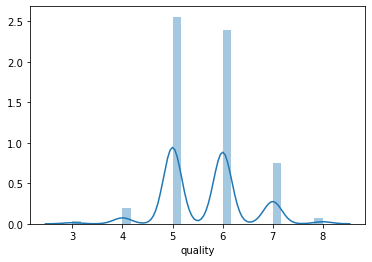

In [5]:

sns.distplot(wine['quality'])

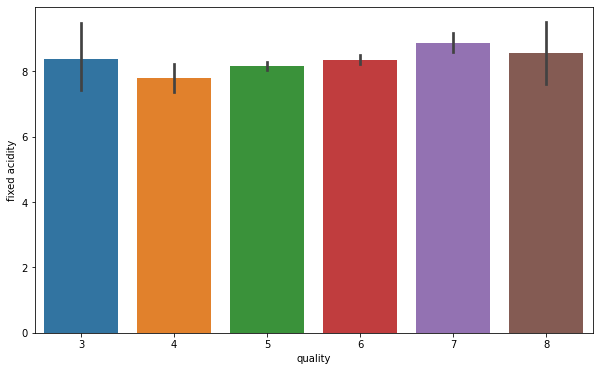

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality' ,y='fixed acidity', data=wine)

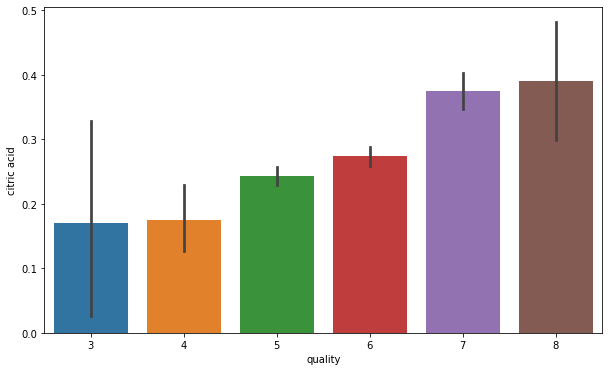

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x='quality' ,y='citric acid', data=wine)

In [8]:
 plt.figure(figsize=(10,6))

    sns.barplot(x='quality' ,y='alcohol', data=wine)

IndentationError: unexpected indent (<ipython-input-8-74f9557ecc00>, line 3)

In [9]:
#quality as bad or good , bad<6.5 ,good>6.5 t o 8

bound = (2, 6.5, 8)
catg = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bound, labels = catg)

In [10]:
wine['quality']

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): [bad < good]

In [11]:
wine['quality'].value_counts()

bad     1382
good     217
Name: quality, dtype: int64

In [12]:
#data preprocessing 
from sklearn.preprocessing import LabelEncoder

In [13]:
encode=LabelEncoder()

In [14]:
wine['quality']=encode.fit_transform(wine['quality'])

In [15]:
wine['quality']

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#divide into train or test
X=wine.drop(['quality'], axis=1)
y=wine['quality']
X_train ,X_test, y_train, y_test = train_test_split(X ,y, test_size=0.30, random_state=101)

In [18]:
#sklearn model for datasests
from sklearn.linear_model import LogisticRegression

In [19]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [20]:
predictions = logmodel.predict(X_test)

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       412
           1       0.44      0.28      0.34        68

    accuracy                           0.85       480
   macro avg       0.66      0.61      0.63       480
weighted avg       0.82      0.85      0.83       480

